In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress


In [2]:
with open('movie_data.txt') as json_file:
    data = json.load(json_file)

In [3]:
data['1998']['Deep Impact']

{'Title': 'Deep Impact',
 'Year': '1998',
 'Rated': 'PG-13',
 'Released': '08 May 1998',
 'Runtime': '120 min',
 'Genre': 'Action, Drama, Sci-Fi',
 'Director': 'Mimi Leder',
 'Writer': 'Bruce Joel Rubin, Michael Tolkin',
 'Actors': 'Robert Duvall, Téa Leoni, Elijah Wood',
 'Plot': 'A comet is discovered to be on a collision course with Earth. As doomsday nears, the human race prepares for the worst.',
 'Language': 'English, Russian',
 'Country': 'United States',
 'Awards': '5 wins & 14 nominations',
 'Poster': 'https://m.media-amazon.com/images/M/MV5BYTUwMTY1YmMtN2U5NC00YjkzLTg0YWQtZmEwNTEzZjdkNzQ2XkEyXkFqcGdeQXVyMTQxNzMzNDI@._V1_SX300.jpg',
 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '6.2/10'},
  {'Source': 'Rotten Tomatoes', 'Value': '45%'},
  {'Source': 'Metacritic', 'Value': '40/100'}],
 'Metascore': '40',
 'imdbRating': '6.2',
 'imdbVotes': '168,136',
 'imdbID': 'tt0120647',
 'Type': 'movie',
 'DVD': '01 Aug 2013',
 'BoxOffice': 140464664,
 'Production': 'Paramount

In [4]:
run_times = []
boxes = []
meta_score = []
imdb_score = []
mpaa_rating = []
movie_title = []
released = []

for year in list(data.keys()):
    movies = list(data[year].keys())
    for movie in movies:
        try:
            run = data[year][movie]['Runtime'][0:-4]
            box = data[year][movie]['BoxOffice']
            meta = data[year][movie]['Metascore']
            imdb = data[year][movie]['imdbRating']
            mpaa = data[year][movie]['Rated']
            mov = data[year][movie]['Title']
            rel = data[year][movie]['Released'][3:6]
            boxes.append(box)
            run_times.append(run)
            meta_score.append(meta)
            imdb_score.append(imdb)
            mpaa_rating.append(mpaa)
            movie_title.append(mov)
            released.append(rel)
                
        except Exception as e:
            print(str(e)+" Year: "+year+" Movie: "+movie)
        


r_box = {'Title': movie_title,
    'Box Office': boxes,
        'Runtime': run_times, 
        'Metascore': meta_score, 
         'IMDB Score': imdb_score,
        'MPAA Rating': mpaa_rating, 
         'Month Released': released
        }

r_df = pd.DataFrame(r_box)
r_df

,Title,Box Office,Runtime,Metascore,IMDB Score,MPAA Rating,Month Released
0,Star Wars: Episode V - The Empire Strikes Back,292753960,124,82,8.7,PG,Jun
1,Stir Crazy,101300000,111,56,6.8,R,Dec
2,Any Which Way You Can,70687344,116,51,6.1,PG,Dec
3,Private Benjamin,69847348,109,59,6.2,R,Oct
4,Coal Miner's Daughter,67182787,124,87,7.5,PG,Mar
...,...,...,...,...,...,...,...
1748,Let Him Go,9358025,113,63,6.7,R,Nov
1749,Freaky,9030855,102,67,6.3,R,Nov
1750,Downhill,8287061,86,49,4.9,R,Feb
1751,The Hunt,5812500,90,50,6.5,R,Mar


In [6]:


r_df['Runtime'] = r_df['Runtime'].astype('int64')
r_df['IMDB Score'] = r_df['IMDB Score'].astype(float)

r_df.dtypes

Title              object
Box Office          int64
Runtime             int64
Metascore          object
IMDB Score        float64
MPAA Rating        object
Month Released     object
dtype: object

In [11]:
bins = [0, 79.9, 84.9, 89.9, 94.9, 99.9, 104.9, 109.9, 114.9, 119.9, 124.9, 129.9, 134.9, 139.9, 144.9, 
       149.9, 154.9, 205]

group_names = ['0-80', '80-85', '85-90', '90-95', '95-100', '100-105', '105-110', '110-115', '115-120', 
              '120-125', '125-130', '130-135', '135-140', '140-145', '145-150', '150-155', '>155']

r_df['Runtime Group'] = pd.cut(r_df['Runtime'], bins, labels=group_names, include_lowest= True)
r_df

,Title,Box Office,Runtime,Metascore,IMDB Score,MPAA Rating,Month Released,Runtime Group
0,Star Wars: Episode V - The Empire Strikes Back,292753960,124,82,8.7,PG,Jun,120-125
1,Stir Crazy,101300000,111,56,6.8,R,Dec,110-115
2,Any Which Way You Can,70687344,116,51,6.1,PG,Dec,115-120
3,Private Benjamin,69847348,109,59,6.2,R,Oct,105-110
4,Coal Miner's Daughter,67182787,124,87,7.5,PG,Mar,120-125
...,...,...,...,...,...,...,...,...
1748,Let Him Go,9358025,113,63,6.7,R,Nov,110-115
1749,Freaky,9030855,102,67,6.3,R,Nov,100-105
1750,Downhill,8287061,86,49,4.9,R,Feb,85-90
1751,The Hunt,5812500,90,50,6.5,R,Mar,90-95


In [12]:
group_df = r_df.groupby(['Runtime Group'])
print(group_df['Box Office'].mean())
print(group_df['Box Office'].count())
print(group_df['Box Office'].mean().max())
print(group_df['Box Office'].mean().min())

Runtime Group
0-80       6.027558e+07
80-85      8.591451e+07
85-90      8.869544e+07
90-95      8.968109e+07
95-100     8.190218e+07
100-105    8.717080e+07
105-110    8.905361e+07
110-115    8.240898e+07
115-120    1.110345e+08
120-125    1.202208e+08
125-130    1.236430e+08
130-135    1.299920e+08
135-140    1.575476e+08
140-145    1.990024e+08
145-150    2.119422e+08
150-155    2.111155e+08
>155       2.168230e+08
Name: Box Office, dtype: float64
Runtime Group
0-80        14
80-85       42
85-90       99
90-95      167
95-100     206
100-105    213
105-110    208
110-115    160
115-120    162
120-125    115
125-130     99
130-135     77
135-140     57
140-145     48
145-150     23
150-155     23
>155        40
Name: Box Office, dtype: int64
216823028.525
60275583.21428572


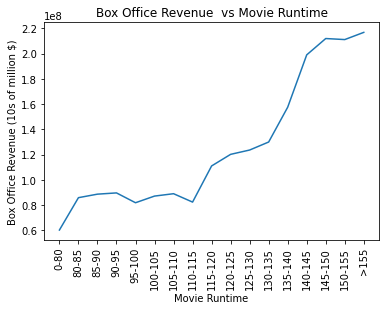

In [14]:
plt.plot(group_df['Box Office'].mean())
plt.xticks(np.arange(0, 17, step=1),rotation = 90)
plt.xlabel('Movie Runtime')
plt.ylabel('Box Office Revenue (10s of million $)')
plt.title('Box Office Revenue  vs Movie Runtime')
plt.show()

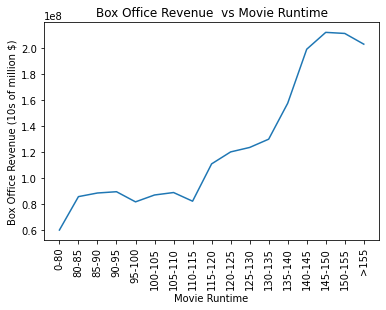

,Title,Box Office,Runtime,Metascore,IMDB Score,MPAA Rating,Month Released,Runtime Group
0,Star Wars: Episode V - The Empire Strikes Back,292753960,124,82,8.7,PG,Jun,120-125
1,Stir Crazy,101300000,111,56,6.8,R,Dec,110-115
2,Any Which Way You Can,70687344,116,51,6.1,PG,Dec,115-120
3,Private Benjamin,69847348,109,59,6.2,R,Oct,105-110
4,Coal Miner's Daughter,67182787,124,87,7.5,PG,Mar,120-125
...,...,...,...,...,...,...,...,...
1748,Let Him Go,9358025,113,63,6.7,R,Nov,110-115
1749,Freaky,9030855,102,67,6.3,R,Nov,100-105
1750,Downhill,8287061,86,49,4.9,R,Feb,85-90
1751,The Hunt,5812500,90,50,6.5,R,Mar,90-95


In [15]:
no_avatar = r_df.loc[r_df['Title']!='Avatar']
no_a_group = no_avatar.groupby(['Runtime Group'])
plt.plot(no_a_group['Box Office'].mean())
plt.xticks(np.arange(0, 17, step=1),rotation = 90)
plt.xlabel('Movie Runtime')
plt.ylabel('Box Office Revenue (10s of million $)')
plt.title('Box Office Revenue  vs Movie Runtime')
plt.show()
no_avatar

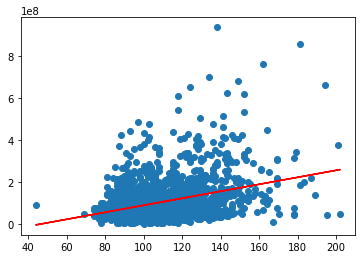

2.2549448883482515e-45 0.3284657743697047


In [40]:
x_run = r_df['Runtime']
y_run = r_df['Box Office']
plt.scatter(x_run, y_run)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_run, y_run)
regress_values = x_run * slope + intercept
plt.plot(x_run,regress_values,"r-")
plt.show()
print(pvalue, rvalue)

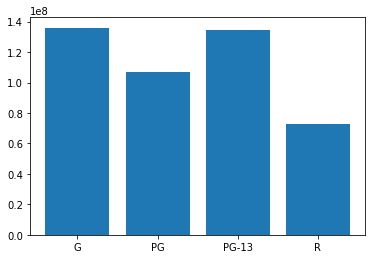

,MPAA Rating,Box Office,Runtime,IMDB Score
0,G,1.359809e+08,92.754098,6.624590
2,PG,1.070141e+08,103.506667,6.413333
3,PG-13,1.341792e+08,116.288372,6.526512
4,R,7.272650e+07,112.631933,6.660504


In [25]:
mpaa_group = r_df.groupby(['MPAA Rating'])
mpaa_df = mpaa_group.mean().reset_index(inplace=False)
mpaa_df = mpaa_df.drop(index = [1,5])
x_mpaa = mpaa_df.iloc[:, 0]
y_mpaa = mpaa_df.iloc[:, 1]
plt.bar(x_mpaa, y_mpaa)
plt.show()
mpaa_df

In [26]:
bins_meta = [0,29.9,39.9, 49.9, 59.9, 69.9, 79.9, 89.9, 100]
group_meta = ['0-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']

#Droping the N/A values
meta_df = r_df.loc[r_df['Metascore']!='N/A']
meta_df


,Title,Box Office,Runtime,Metascore,IMDB Score,MPAA Rating,Month Released,Runtime Group
0,Star Wars: Episode V - The Empire Strikes Back,292753960,124,82,8.7,PG,Jun,120-125
1,Stir Crazy,101300000,111,56,6.8,R,Dec,110-115
2,Any Which Way You Can,70687344,116,51,6.1,PG,Dec,115-120
3,Private Benjamin,69847348,109,59,6.2,R,Oct,105-110
4,Coal Miner's Daughter,67182787,124,87,7.5,PG,Mar,120-125
...,...,...,...,...,...,...,...,...
1748,Let Him Go,9358025,113,63,6.7,R,Nov,110-115
1749,Freaky,9030855,102,67,6.3,R,Nov,100-105
1750,Downhill,8287061,86,49,4.9,R,Feb,85-90
1751,The Hunt,5812500,90,50,6.5,R,Mar,90-95


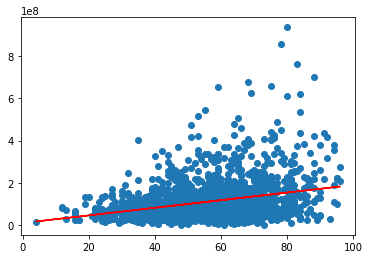

1.9422446580595905e-34 0.29292560919083566


In [30]:
x = meta_df['Metascore'].astype(int)
y_1 = meta_df['Box Office']
plt.scatter(x, y_1)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y_1)
regress_values = x * slope + intercept
plt.plot(x,regress_values,"r-")
plt.show()
print(pvalue, rvalue)

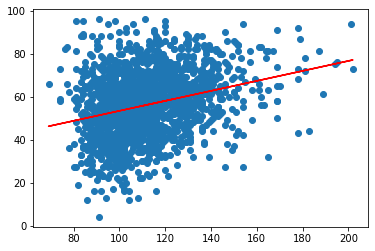

1.2574271936292692e-31 0.2806024314432422


In [44]:
from scipy.stats import linregress
x = meta_df['Metascore'].astype(int)
y_2 = meta_df['Runtime']
plt.scatter(x, y_2)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y_2)
regress_values = x * slope + intercept
plt.plot(x,regress_values,"r-")
plt.show()
print(pvalue, rvalue)

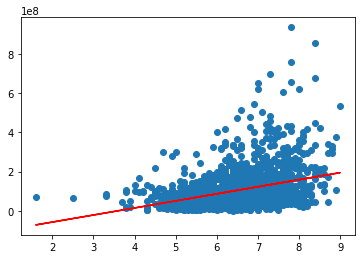

4.510393021140272e-47 0.33443819765618116


In [43]:
# bins_3 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10 ]
# groups_3 = ['0-1','1-2','2-3','3-4','4-5',]

x_i = r_df['IMDB Score']
y_i = r_df['Box Office']
plt.scatter(x_i, y_i)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_i, y_i)
regress_values = x_i * slope + intercept
plt.plot(x_i,regress_values,"r-")
plt.show()
print(pvalue, rvalue)

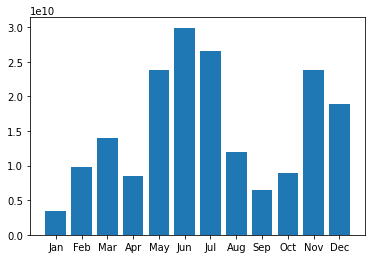

In [51]:
months = r_df.groupby(['Month Released']).sum().reset_index(inplace=False)
months = months.reindex([4,3,7,0,8,6,5,1,11,10,9,2])
plt.bar(months['Month Released'], months['Box Office'])
plt.title('Total Revenue per month')
plt.show()


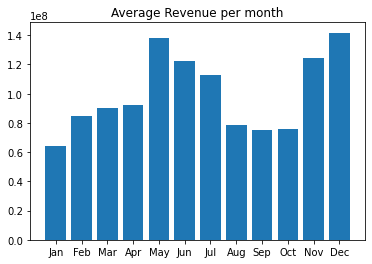

In [52]:
months = r_df.groupby(['Month Released']).mean().reset_index(inplace=False)
months = months.reindex([4,3,7,0,8,6,5,1,11,10,9,2])
plt.bar(months['Month Released'], months['Box Office'])
plt.title('Average Revenue per month')
plt.show()


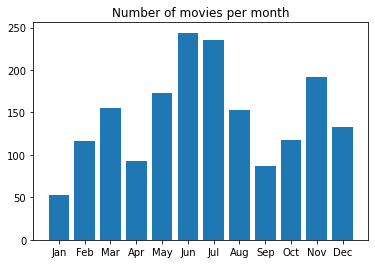

In [53]:
months = r_df.groupby(['Month Released']).count().reset_index(inplace=False)
months = months.reindex([4,3,7,0,8,6,5,1,11,10,9,2])
plt.bar(months['Month Released'], months['Box Office'])
plt.title('Number of movies per month')
plt.show()
